In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from starkhelium import *
from tqdm import trange, tqdm
import os

from scipy.constants import h, hbar, c, alpha, m_e, m_p, e, epsilon_0, atomic_mass, pi, physical_constants
from scipy.special import factorial, assoc_laguerre
a_0 = physical_constants['Bohr radius'][0]
En_h = alpha**2.0 * m_e * c**2.0;
scl = c*10**-9 * En_h /(h * c);

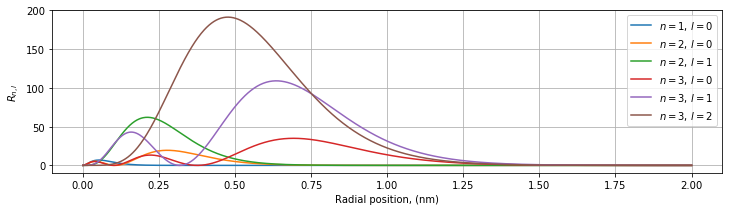

In [23]:
# Hydrogen radial wavefunction
nmax = 3

r = np.linspace(0,20,1000) * 10**-10 # Radial position, in Ang
dr = np.diff(r)[0]
Z = 1 # Charge
M = m_p
reduced_mass = m_e * M / (m_e + M)
a = (m_e / reduced_mass) * a_0

plt.figure(figsize=(12,3))
for n in range(nmax+1):
    for l in np.arange(0,n):
        N_n_l = ( (2*Z) / (n*a) )**(3/2) * ( factorial(n-l-1) / factorial(2*n*(n+l)) )**0.5
        lagPoly = assoc_laguerre((2*Z*r)/(n*a), n-l-1, 2*l+1)
        R_n_l = N_n_l * ((2*Z*r) / (n*a))**l * np.exp(-(Z*r) / (n*a)) * lagPoly
        norm = ( np.sum( (R_n_l*dr)**2 ) )**0.5
        R_n_l = R_n_l / norm
        plt.plot(r * 10**9, R_n_l**2 * r**2, label="$n=$" + str(n) + ", $l=$" + str(l))

plt.xlabel('Radial position, (nm)')
plt.ylabel('$R_{n,l}$')
plt.grid()
plt.legend()